In [1]:
import pandas as pd
import hddm

data = hddm.load_csv('risk_data.csv')

/anaconda3/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
model_no_bias = hddm.models.HDDMRegressor(data, ['v ~ loss + gain', 'a ~ loss'], group_only_regressors=False)

Adding these covariates:
['v_Intercept', 'v_loss', 'v_gain']
Adding these covariates:
['a_Intercept', 'a_loss']


In [3]:
model_no_bias.find_starting_values()

/anaconda3/lib/python2.7/site-packages/scipy/optimize/optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/anaconda3/lib/python2.7/site-packages/scipy/optimize/optimize.py:1935: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1


In [4]:
model_no_bias.sample(2500, burn=1000)

 [-----------------100%-----------------] 2501 of 2500 complete in 13899.2 sec

In [5]:
model_no_bias.print_stats()

                            mean          std         2.5q          25q          50q          75q        97.5q       mc err
t                       0.365322    0.0210792     0.325239     0.350392     0.365119     0.378187     0.408167  0.000762465
t_std                   0.141932    0.0178489     0.109923     0.129626     0.140532     0.153197     0.179503  0.000641026
t_subj.1                0.377043    0.0339862     0.306632     0.354539     0.378534     0.401062     0.438032   0.00146586
t_subj.2                0.435507    0.0143124     0.403208     0.426577     0.437074     0.445769     0.461103  0.000539674
t_subj.3                0.241087    0.0386873     0.159989     0.215545     0.243829     0.266091     0.312642   0.00154694
t_subj.4                0.612414    0.0192997      0.57149     0.599679     0.614029      0.62675     0.645419  0.000879322
t_subj.5                0.236076    0.0331581     0.167771     0.213858     0.237607     0.260183     0.295808   0.00183119
t_subj.6

Text(0,0.5,'Model')

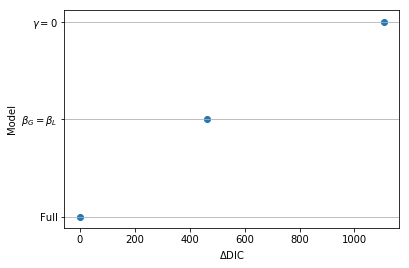

In [30]:
y = [1, 2, 3]
x = [0, 17331.440239-16869.864045, 17977.374206-16869.864045]

from matplotlib import pyplot as plt
plt.scatter(x, y)
plt.yticks((1, 2, 3), ('Full', r'$\beta_G = \beta_L$', '$\gamma = 0$'))
plt.grid(axis='y')
plt.xlabel("$\Delta$DIC")
plt.ylabel("Model")